In [82]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
from influxdb import *
import datetime                        
import matplotlib.pyplot as plt                    # plots
import seaborn as sns                              # more plots
from dateutil.relativedelta import relativedelta   # working with dates with style
from scipy.optimize import minimize                # for function minimization
import statsmodels.formula.api as smf              # statistics and econometrics
import statsmodels.tsa.api as smt
import statsmodels.api as sm
import scipy.stats as scs
from itertools import product                      # some useful functions
#from tqdm import tqdm_notebook
%matplotlib inline
from datetime import datetime, timedelta
from scipy import stats
from sklearn.metrics import mean_squared_error
from math import sqrt
#from mlxtend.regressor import LinearRegression

In [83]:
data = pd.read_excel(r'C:\Users\u22v09\Desktop\Data_holt_winter_model.xlsx')
data = data.rename(columns = {'Unnamed: 0':'time'})
data = data.set_index('time') 

In [84]:
EM4 = data.copy()

In [85]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(EM4['EM4'])
print('ADF Statistic: %f' % result[0])
print('p-value: %.12f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -7.669015
p-value: 0.000000000016
Critical Values:
	1%: -3.441
	5%: -2.866
	10%: -2.569


In [86]:
len(EM4)

600

In [87]:
print(EM4.index.min())
print(EM4.index.max())

2020-06-15 00:00:00
2020-07-09 23:00:00


In [88]:
df = EM4.copy()

In [118]:
train = EM4[0:500] 
test = EM4[500:]

In [116]:
from statistics import stdev 

In [135]:
l=[]
x = int(n/2)
for j in range(2,x):
    fit1 = ExponentialSmoothing(np.asarray(train['EM4']) ,seasonal_periods = j, trend='add', seasonal='add').fit()
    x = fit1.forecast(len(test))
    rms = sqrt(mean_squared_error(test.EM4, x))
    l.append(rms)

y = pd.DataFrame(l)
#y.reset_index(inplace = True)
s = y
print(y[0].min())
y = (y[y[0]<=y[0].min()].index.values)[0]

y = y + 2
print(y)

66.1678887338261
15


In [141]:
# from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
from statsmodels.tsa.holtwinters import ExponentialSmoothing 
y_hat_avg = test.copy()

fit1 = ExponentialSmoothing(np.asarray(train['EM4']) ,seasonal_periods = y, trend='add', seasonal='add').fit()
#simulations = fit1.simulate(8, repetitions=100, error='add')

y_hat_avg['Holt_Winter'] = fit1.forecast(len(test))
y_hat_avg['test_mean'] = test['EM4'].mean()
y_hat_avg['test_sd'] = stdev(test['EM4'])
y_hat_avg['-SD']=y_hat_avg['test_mean']-y_hat_avg['test_sd']
y_hat_avg['+SD']=y_hat_avg['test_mean']+y_hat_avg['test_sd']
plt.figure(figsize=(20,8))
plt.plot( train['EM4'], label='Train', lw = 3,color='dodgerblue')
plt.plot(test['EM4'], label='Test', lw = 3,color='orange')
plt.plot(y_hat_avg['Holt_Winter'], label='Holt_Winter', lw = 2,color='green')
plt.plot(y_hat_avg['test_mean'], label='Average Test', lw = 4,color='orangered')
plt.fill_between(y_hat_avg.index,y_hat_avg['-SD'], y_hat_avg['+SD'],alpha=0.3,color='slategrey')
plt.legend(loc='best')
plt.show()
rms6 = sqrt(mean_squared_error(y_hat_avg.EM4, y_hat_avg.Holt_Winter))
print(rms6)

1436508.5179676714


In [161]:
fit = ExponentialSmoothing(np.asarray(train['EM4']) ,seasonal_periods = y, trend='add', seasonal='add').fit()
fcast = fit.forecast(5)#.rename('Forecast')
xhat = fcast

z = 1.96
sse = fit.sse
predint_xminus = xhat - z * np.sqrt(sse/len(train))
predint_xplus  = xhat + z * np.sqrt(sse/len(train))

In [162]:
predint_xminus

array([51.7942121 , 56.83535268, 40.21681512, 33.6528072 , 31.08227933])

In [163]:
predint_xplus

array([261.90829774, 266.94943831, 250.33090076, 243.76689283,
       241.19636496])

In [164]:
xhat

array([156.85125492, 161.89239549, 145.27385794, 138.70985001,
       136.13932214])

0    33.516015
dtype: float64


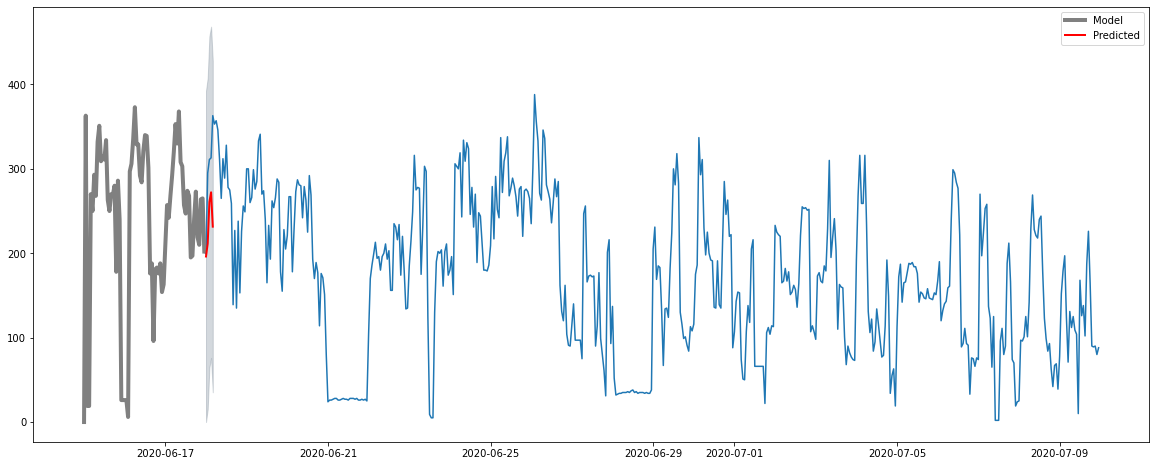

0    35.23176
dtype: float64


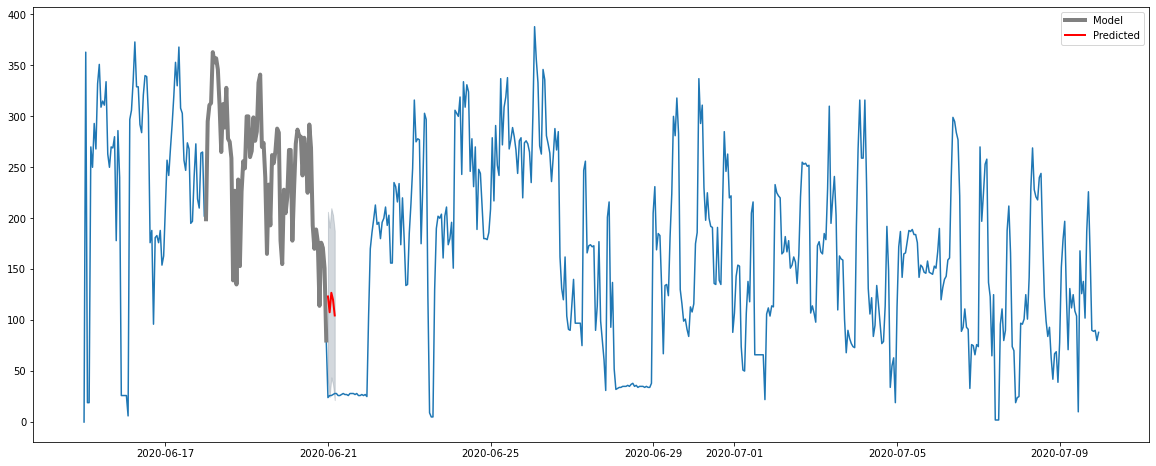

0    75.348422
dtype: float64


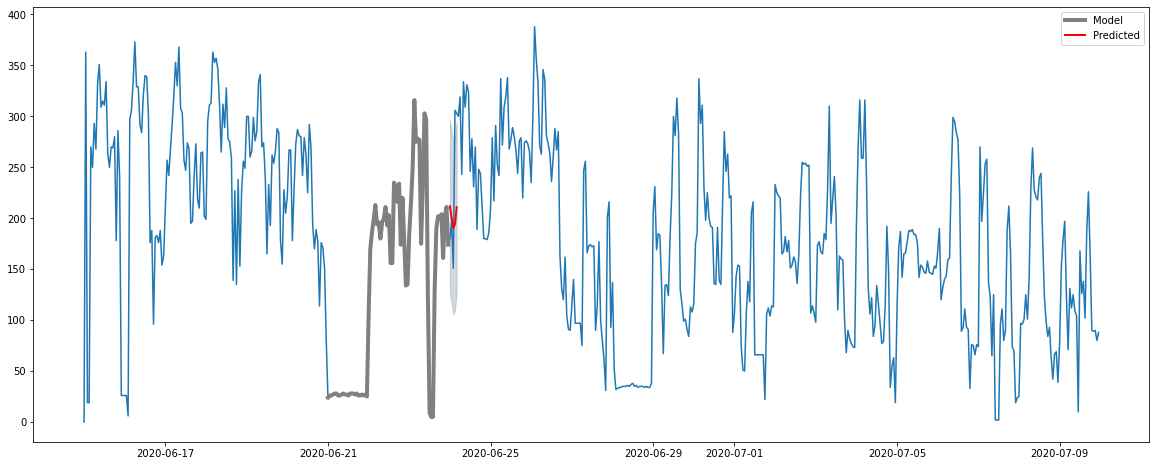

0    68.744768
dtype: float64


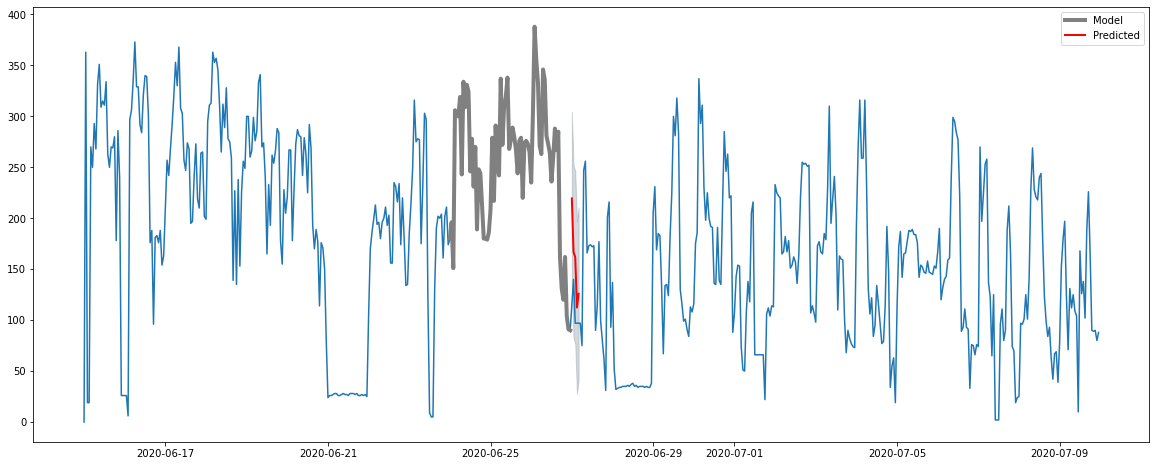

0    59.027807
dtype: float64


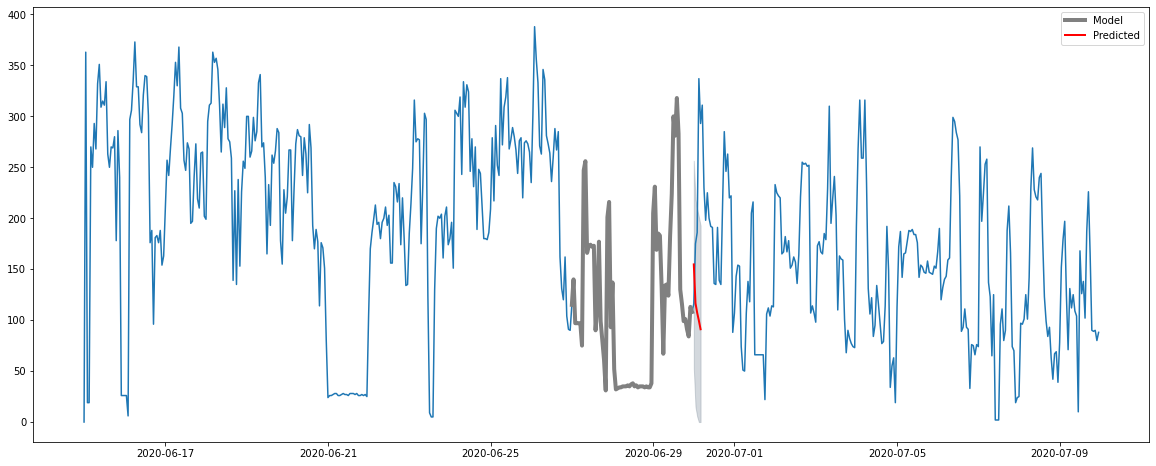

0    46.801264
dtype: float64


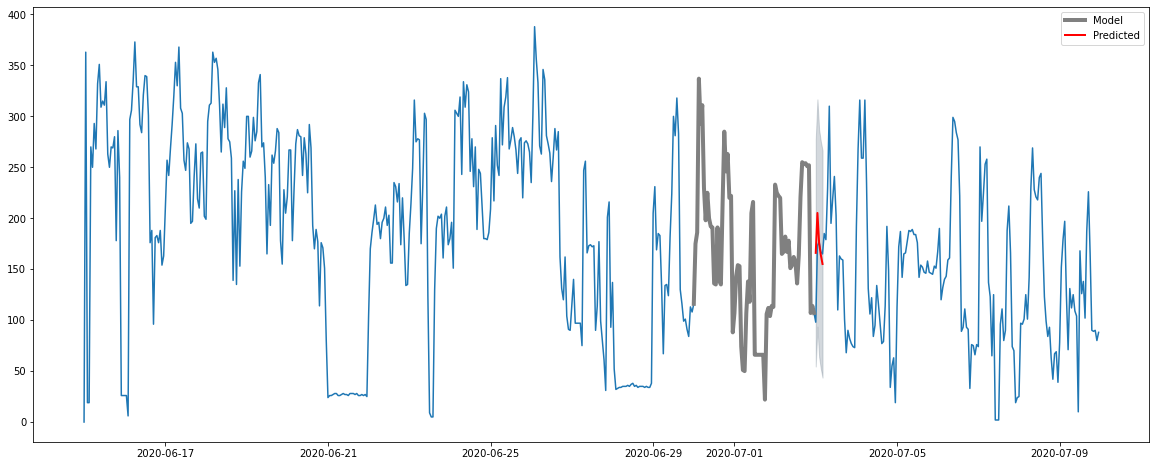

0    6.016155
dtype: float64


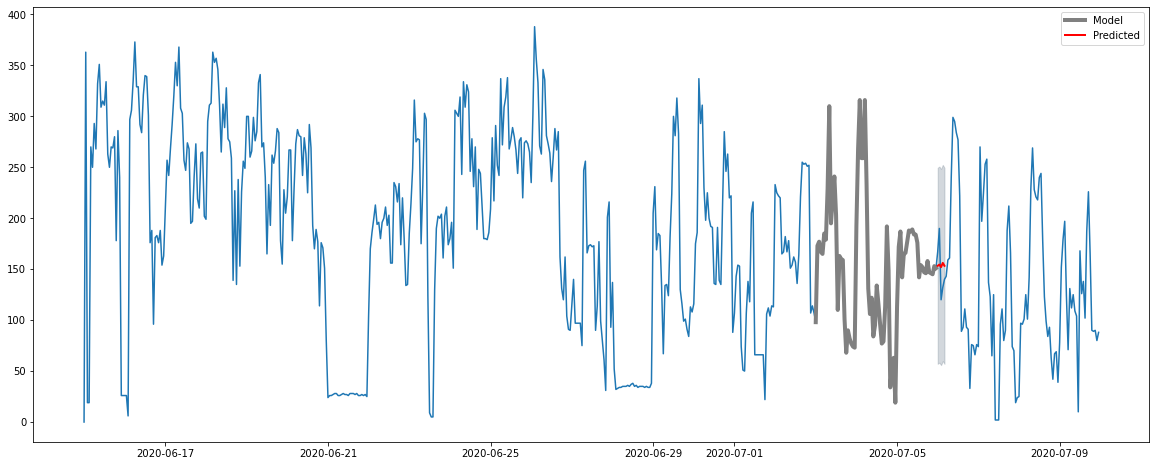

0    37.136599
dtype: float64


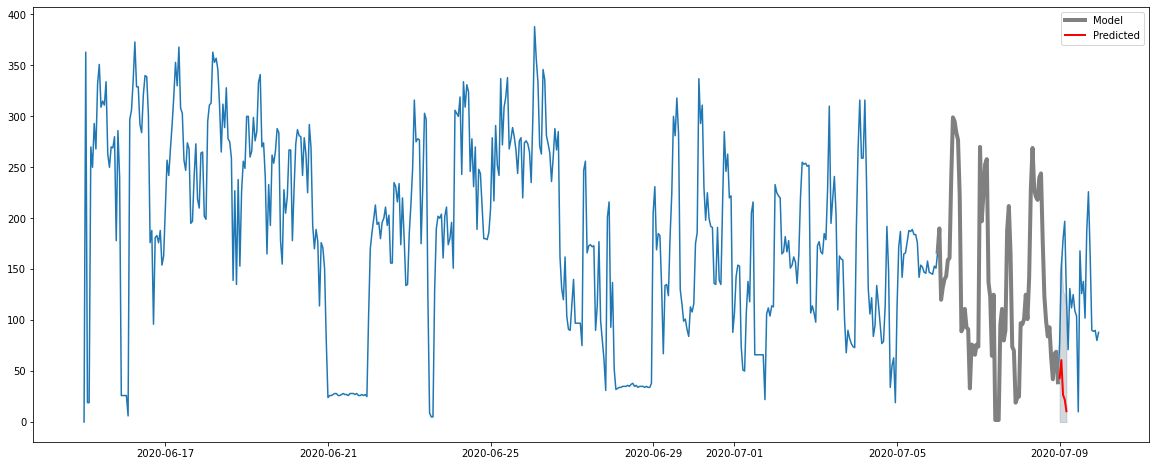

94.49204619375708


In [188]:
m=0
predint_xminus=[]
predint_xplus=[]

for i in range(72,len(EM4),72):
    EM4_new = EM4.iloc[m:i]
    m=i
    n = 72
    model = EM4_new[-(n):]
    train = EM4_new[-(n+1):-1]
    test = EM4_new[-10:]
    import warnings
    warnings.filterwarnings('ignore')

    l=[]
    x = int(n/2)
    for j in range(2,x):
        fit1 = ExponentialSmoothing(np.asarray(train['EM4']) ,seasonal_periods = j, trend='add', seasonal='add').fit()
        x = fit1.forecast(len(test))
        rms = sqrt(mean_squared_error(test.EM4, x))
        l.append(rms)
        
    y = pd.DataFrame(l)
    s = y
    print(y.min())
    y = (y[y[0]<=y[0].min()].index.values)[0]
    y = y + 2
    
    a = 5
    fit1 = ExponentialSmoothing(np.asarray(model['EM4']) ,seasonal_periods = y, trend='add', seasonal='add').fit()
    x = fit1.forecast(a)
    z = 1.96
    sse = fit1.sse
    predint_xminus = x - z * np.sqrt(sse/len(train))
    predint_xplus  = x + z * np.sqrt(sse/len(train))
    predint_xminus[predint_xminus < 0] = 0
    
    date = [(model.index.max() + pd.offsets.Hour(1)),(model.index.max() + pd.offsets.Hour(2)), (model.index.max() + pd.offsets.Hour(3)), (model.index.max() + pd.offsets.Hour(4)), (model.index.max() + pd.offsets.Hour(5))]
    predicted = pd.DataFrame([date,x,predint_xminus,predint_xplus]).T
    predicted = predicted.rename(columns = {0:'time',1:'EM4',2:'lower_bound',3:'upper_bound'})
    predicted = predicted.set_index('time')

    plt.figure(figsize=(20,8))
#     plt.plot( train['EM4'], label='Train', lw = 2)
#     plt.plot(test['EM4'], label='Test', lw = 4)
    plt.plot(EM4['EM4'])
    plt.plot(model['EM4'], label='Model', lw = 4, color = 'grey')
    plt.plot(predicted['EM4'], label='Predicted', lw = 2, color = 'red')
    plt.fill_between(predicted.index,predint_xminus, predint_xplus,alpha=0.3,color='slategrey')
    plt.legend(loc='best')
    plt.show()

print(s[0].mean())
